In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
tf.__version__

'2.6.0'

In [3]:
import sklearn

In [4]:
sklearn.__version__

'1.0.1'

In [5]:
import numpy as np

In [6]:
np.__version__

'1.19.5'

In [7]:
import pandas as pd

In [8]:
pd.__version__

'1.3.4'

In [9]:
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

(images, targets), (images_valid, targets_valid) = keras.datasets.mnist.load_data()
images, images_valid= images / 255.0, images_valid / 255.0

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


In [19]:
 print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


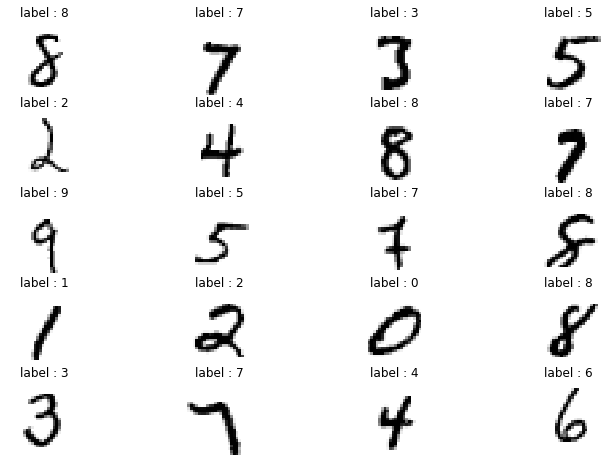

In [105]:
# On selectionne un echantillon de 20 images au hasard
images_demo = images.reshape((-1, 28, 28))
select = np.random.randint(images.shape[0], size=20)

# On affiche les images 
plt.figure(figsize=(12,8))
for index, value in enumerate(select):
    plt.subplot(5,4,index+1)
    plt.axis('off')
    plt.imshow(images_demo[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('label : '+str(targets[value]))

plt.show()




In [21]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Metal device set to: Apple M1


2021-11-06 18:33:01.667581: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-06 18:33:01.668516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 1s 6ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.0794 - val_accuracy: 0.9798
Epoch 2/16
118/118 [==============================] - 1s 5ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.0780 - val_accuracy: 0.9792
Epoch 3/16
118/118 [==============================] - 1s 5ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0780 - val_accuracy: 0.9799
Epoch 4/16
118/118 [==============================] - 1s 5ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0780 - val_accuracy: 0.9794
Epoch 5/16
118/118 [==============================] - 1s 5ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0783 - val_accuracy: 0.9794
Epoch 6/16
118/118 [==============================] - 1s 5ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0785 - val_accuracy: 0.9795
Epoch 7/16
118/118 [==============================] - 1s 5ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.0784 - val_accuracy: 0.9797
Epoch 

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

x1=history.history.get('accuracy')
x2=history.history.get('val_accuracy')

Test loss     : 0.08171392977237701
Test accuracy : 0.9791000485420227


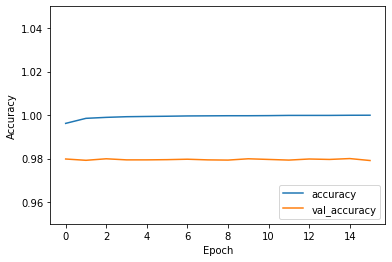

In [36]:
plt.figure()
plt.plot(x1, label='accuracy')
plt.plot(x2, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1.05])
plt.legend(loc='lower right')
plt.show()



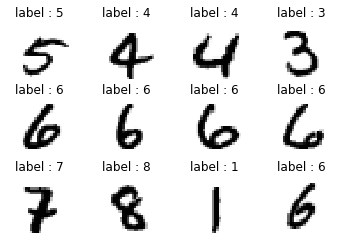

In [108]:
# On selectionne un echantillon du jeu de test cette fois, de 12 images au hasard
images_test= images_valid.reshape((-1, 28, 28))

select = np.random.randint(images_test.shape[0], size=12)

# On affiche les images 
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images_test[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('label : '+str(targets_valid[value]))
     

plt.show()

In [87]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)


In [88]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [98]:
import itertools # Pour créer des iterateurs

cnf_matrix=confusion_matrix(y_test,y_pred)

item=itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])) 
classes = range(0,10)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if(cnf_matrix[i,j] >5 and i!=j):
        print("Le chiffre {0} a souvent été pris pour le chiffre {1}".format(i,j))
        
        


Le chiffre 3 a souvent été pris pour le chiffre 5
Le chiffre 4 a souvent été pris pour le chiffre 9
Le chiffre 5 a souvent été pris pour le chiffre 3
Le chiffre 5 a souvent été pris pour le chiffre 8
Le chiffre 6 a souvent été pris pour le chiffre 4
Le chiffre 6 a souvent été pris pour le chiffre 5
Le chiffre 7 a souvent été pris pour le chiffre 2
Le chiffre 7 a souvent été pris pour le chiffre 9
Le chiffre 8 a souvent été pris pour le chiffre 4
Le chiffre 9 a souvent été pris pour le chiffre 7


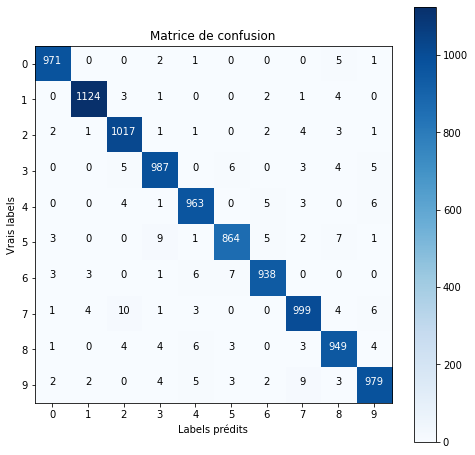

In [166]:
plt.figure(figsize=(8,8))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [150]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]




quelques erreurs de prédictions


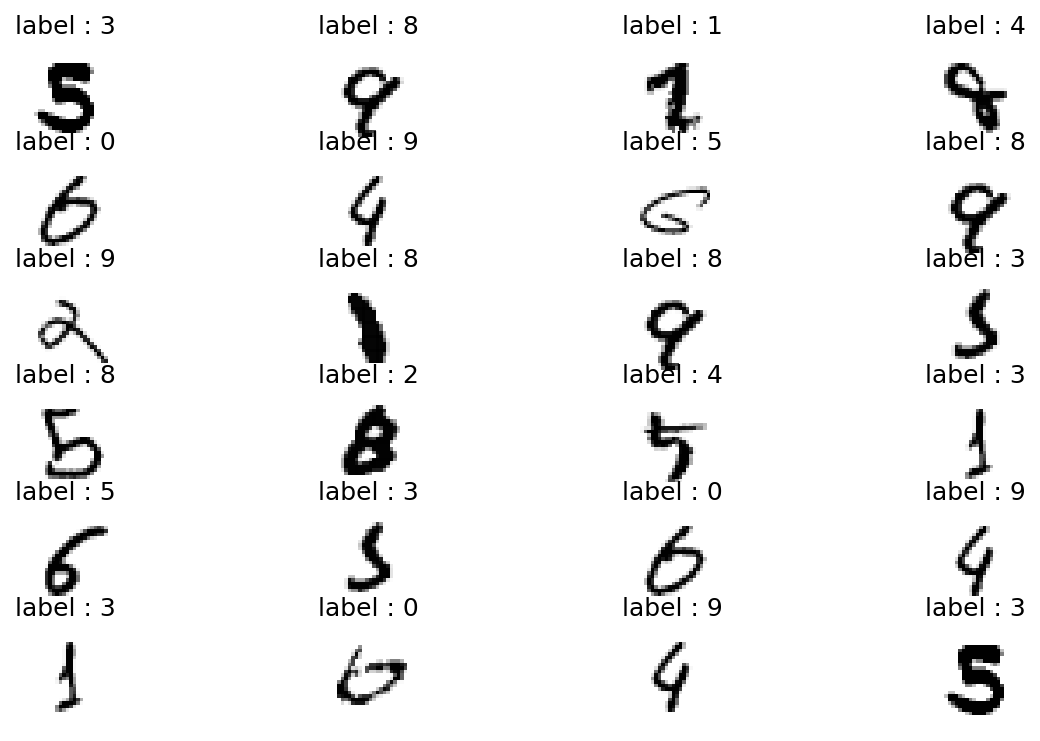

In [167]:
# On affiche les images 
select = np.random.randint(len(errors), size=len(errors))
print("quelques erreurs de prédictions")
plt.figure(num=1,figsize=(10,6),dpi=150)

for index, value in enumerate(select):
    plt.subplot(6,4,index+1)
    plt.axis('off')
    plt.imshow(images_valid[errors[value]],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('label : '+str(y_pred[errors[value]]))
     
plt.show()
